In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
penguins = pd.read_csv(r"C:\Users\KAsab\Downloads\palmerpenguins.csv")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
iris = pd.read_csv(r"C:\Users\KAsab\Downloads\Iris.csv")

In [6]:
iris .head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.columns = [col.lower() for col in iris.columns]

In [8]:
iris.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris["species"] = iris["species"].str.split("-").str.get(1)

In [10]:
iris.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [11]:
X = iris.iloc[:,1:5]
print(X)

     sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [12]:
y = iris["species"]
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()

In [15]:
X_std =ss.fit_transform(X)

In [16]:
kmeans = KMeans(n_clusters =3, random_state = 42 )

In [17]:
kmeans.fit(X_std)

KMeans(n_clusters=3, random_state=42)

In [18]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [19]:
y_kmeans = kmeans.predict(X_std)

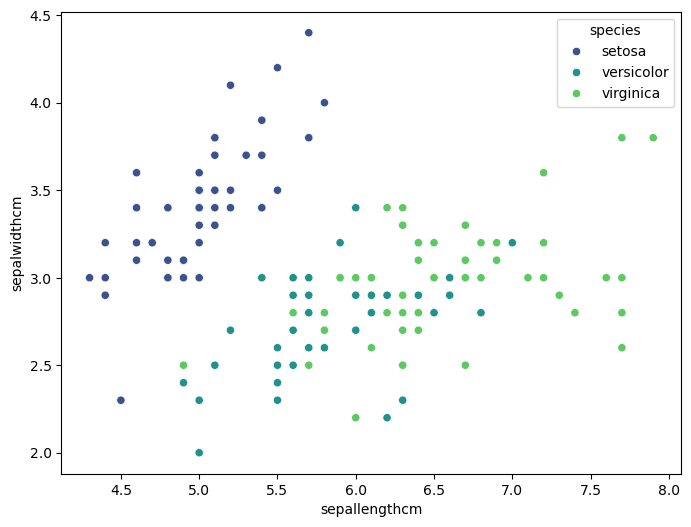

In [20]:
fig,ax  = plt.subplots(figsize = (8,6))
sns.scatterplot(data = iris,
               x ="sepallengthcm",
               y = "sepalwidthcm",
               hue = "species",
                palette = "viridis"
               )
plt.show()

In [21]:
centroids = kmeans.cluster_centers_

In [22]:
print(centroids)

[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


In [23]:
df_std = pd.DataFrame(X_std,columns = X.columns)

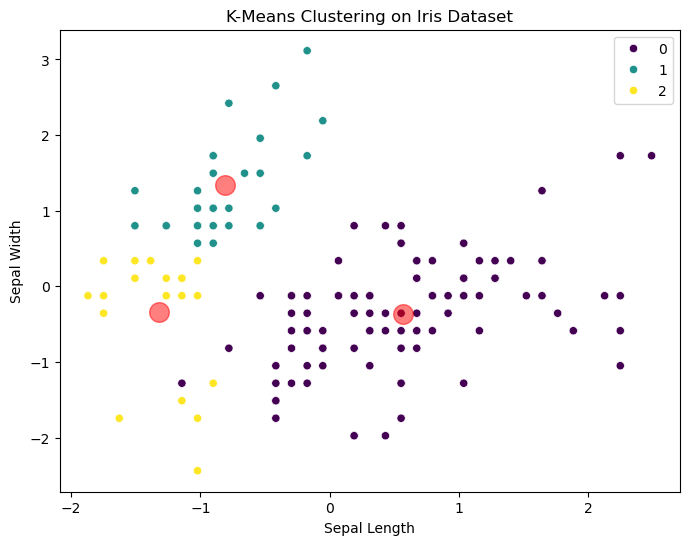

In [24]:
fig,ax  = plt.subplots(figsize = (8,6))
sns.scatterplot(data = df_std,
               x ="sepallengthcm",
               y = "sepalwidthcm",
               hue = y_kmeans,
                palette = "viridis"
               )
plt.scatter(centroids[:,0],centroids[:,1],c = "red",s= 200,alpha = 0.5)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

In [25]:
centroids_df = pd.DataFrame(centroids,columns = X.columns, index = np.unique(y_kmeans))

In [26]:
centroids_df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,0.571004,-0.366002,0.691084,0.663226
1,-0.806019,1.335774,-1.286184,-1.210263
2,-1.319261,-0.345842,-1.144827,-1.133695


In [27]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 192.03717409190025


In [28]:
from sklearn.metrics import silhouette_score,adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score,confusion_matrix

The silhouette score measures how similar a point is to its own cluster compared to other clusters. It ranges from -1 to 1, where 1 means points are well-clustered, 0 means points are on the boundary, and negative values mean points might be in the wrong cluster.

In [29]:
sil_score = silhouette_score(X,kmeans.labels_)
print(f"Silhouette score: {sil_score}")

Silhouette score: 0.5176371015845631


These metrics evaluate clustering by comparing the predicted clusters to true labels:

Homogeneity: Each cluster contains only members of a single class.
Completeness: All members of a given class are assigned to the same cluster.
V-measure: The harmonic mean of homogeneity and completeness

In [30]:
iris.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [31]:
features = iris.iloc[:,1:5]
labels = iris["species"]

In [32]:
features.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [34]:
ss = StandardScaler()
kmeans = KMeans(n_clusters = 3,random_state = 42)
pca = PCA(n_components = 0.99,whiten = True)

In [35]:
features_std = ss.fit_transform(features)

In [36]:
pca

PCA(n_components=0.99, whiten=True)

In [37]:
features_pca = pca.fit_transform(features_std)


In [38]:
df_pca = pd.DataFrame(features_pca,columns = ["pc1","pc2","pc3"])
df_pca.head()

,pc1,pc2,pc3
0,-1.322880,0.525124,-0.316611
1,-1.218829,-0.680574,-0.590029
2,-1.383288,-0.330708,0.133660
3,-1.346045,-0.597463,0.256679
4,-1.395454,0.700680,0.055635


In [39]:
exp_variance = pca.explained_variance_ratio_

In [40]:
exp_variance

array([0.72770452, 0.23030523, 0.03683832])

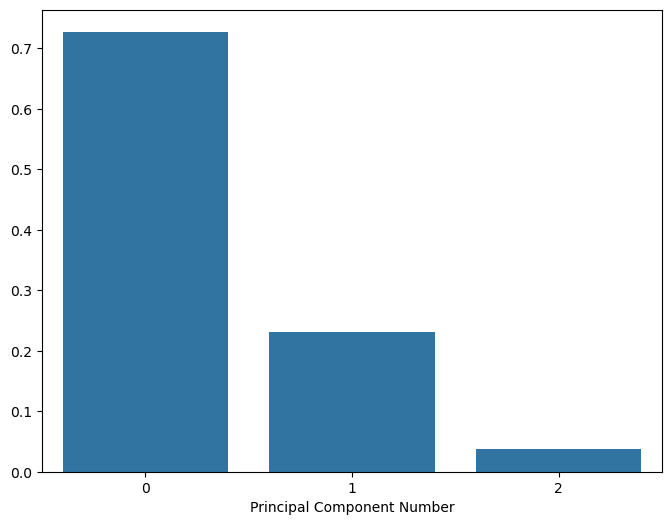

In [41]:
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(exp_variance)
ax.set_xlabel("Principal Component Number")
plt.show()

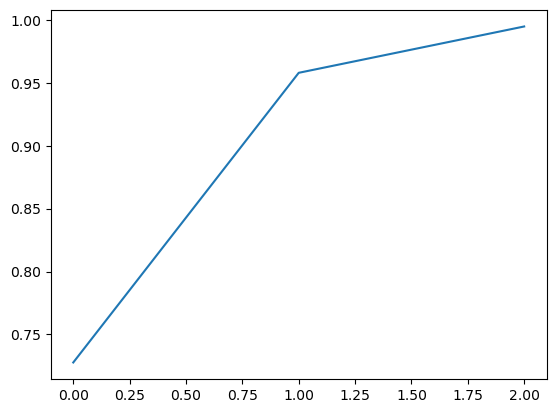

In [42]:
cum_exp_variance = np.cumsum(exp_variance)
fig,ax = plt.subplots()
ax.plot(cum_exp_variance)
plt.show()

In [43]:
features_pca = df_pca.iloc[:,0:2]


In [44]:
kmeans.fit(features_pca)

KMeans(n_clusters=3, random_state=42)

In [45]:
y_means_pca = kmeans.predict(features_pca)

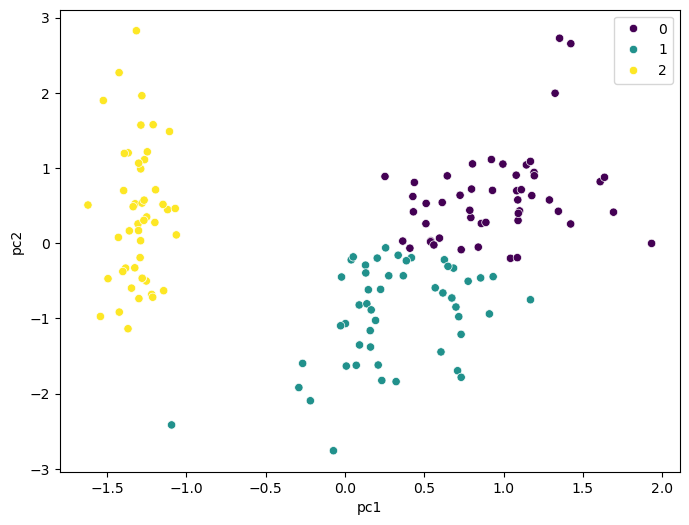

In [46]:
fig,ax = plt.subplots(figsize = (8,6))
sns.scatterplot(
    data = df_pca,
    x = "pc1",
    y = "pc2",
    hue = y_means_pca,
    palette = "viridis"
    )
plt.show()

In [47]:
centroids_pca = kmeans.cluster_centers_

In [48]:
centroids_pca

array([[ 0.95200177,  0.60931322],
       [ 0.31676741, -0.94225659],
       [-1.30112707,  0.35896786]])

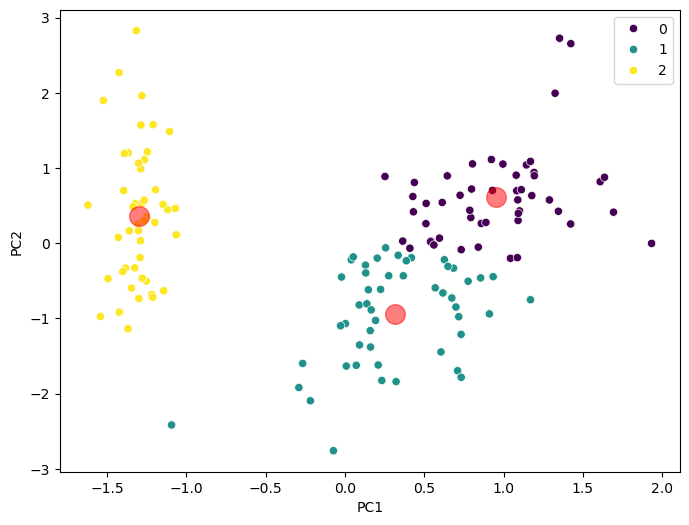

In [49]:
fig,ax = plt.subplots(figsize = (8,6))
sns.scatterplot(
    data = df_pca,
    x = "pc1",
    y = "pc2",
    hue = y_means_pca,
    palette = "viridis"
)
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],c = "red",s = 200,alpha = 0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [50]:
print("Inertia: ",kmeans.inertia_)

Inertia:  94.4561692094079


In [51]:
sil_score_pca = silhouette_score(features_pca,kmeans.labels_)
print("Silhoutte score: ",sil_score_pca)

Silhoutte score:  0.47720076207072526


In [54]:
X.corr()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
sepallengthcm,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.817954,-0.356544,0.962757,1.000000
